In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from statistics import mode

Load the data and split it into training and testing dataset.

In [35]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

Let's see how to first element looks like...

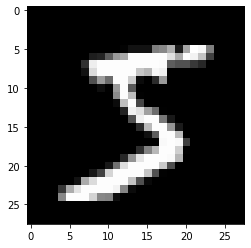

In [3]:
plt.imshow(X_train[0],cmap=plt.get_cmap('gray'))

The first element looks like a 5. Lets observe how the first 9 elements looks like

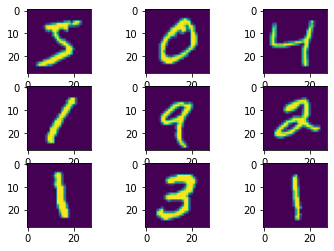

In [4]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i])


Similarly we can use "subplots" instead of "subplot" to plot accross different axes, thus eliminating the need to use 'subplot' multiple times and replace it with a single 'subplots'.

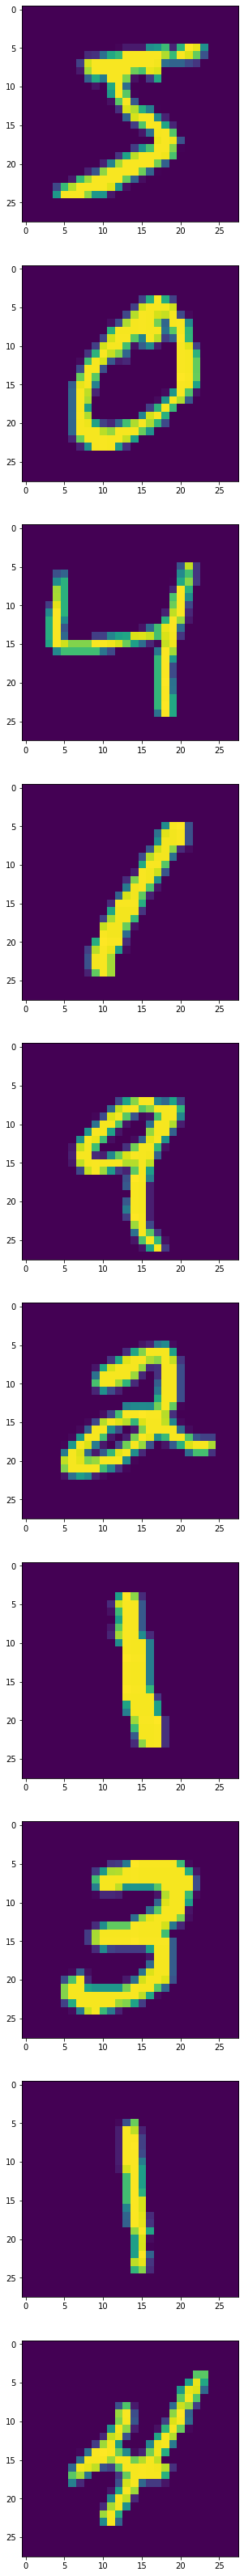

In [7]:
fig, axes= plt.subplots(10,1,figsize=(58,58))
for i in range(10):
  axes[i].imshow(X_train[i])
plt.show()

In [36]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


The shape of the training and test data consists of 2-dimensional 28x28 arrays, which we reshape into a linear array.

In [8]:
X_train=X_train.reshape(len(X_train),-1)
X_test=X_test.reshape(len(X_test),-1)

Let's create and fit the KMeans model.

In [9]:
kmeans=KMeans(10,random_state=1,verbose=1)

In [10]:
kmeans=kmeans.fit(X_train)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 165284939904.74527
start iteration
done sorting
end inner loop
Iteration 1, inertia 157987608137.2341
start iteration
done sorting
end inner loop
Iteration 2, inertia 155847800677.54758
start iteration
done sorting
end inner loop
Iteration 3, inertia 154896244125.24387
start iteration
done sorting
end inner loop
Iteration 4, inertia 154325509921.35583
start iteration
done sorting
end inner loop
Iteration 5, inertia 153938097227.6842
start iteration
done sorting
end inner loop
Iteration 6, inertia 153657310212.39597
start iteration
done sorting
end inner loop
Iteration 7, inertia 153457331258.22687
start iteration
done sorting
end inner loop
Iteration 8, inertia 153311001225.67047
start iteration
done sorting
end inner loop
Iteration 9, inertia 153212789493.305
start iteration
done sorting
end inner loop
Iteration 10, inertia 153146924221.32874
start iteration
done sorting
end inner loop
Iteration 1

Let's store the predicted values in y_pred

In [11]:
y_pred=kmeans.predict(X_test)

In [12]:
y_pred[:10]

array([0, 1, 9, 2, 3, 9, 6, 6, 3, 0], dtype=int32)

In [13]:
Y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

A thing to notice here is that the cluster label is not the same as the original digit that it is supposed to represent since the model randomly assigns the cluster labels.

In [17]:
kmeans.labels_[:15]

array([8, 2, 3, 9, 6, 4, 7, 8, 7, 0, 8, 9, 1, 5, 7], dtype=int32)

In [18]:
Y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

Let's correct this by creating a dictionary and storing in it the values of every label that appears for that particular digit. Then the label occuring maximum number of times is taken as the appropiate label for that digit.

In [19]:
dct={i:[] for i in np.unique(Y_train)}

In [20]:
for i in range(len(kmeans.labels_)):
  dct[Y_train[i]].append(kmeans.labels_[i])

dct.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
for k,v in dct.items():
  dct[k]=mode(v)
  print(dct[k])

2
7
4
1
3
8
5
0
8
6


In [22]:
for i in dct.items():
  print(i)

(0, 2)
(1, 7)
(2, 4)
(3, 1)
(4, 3)
(5, 8)
(6, 5)
(7, 0)
(8, 8)
(9, 6)


Now we have a dictionary that stores the digit value for every label in the kmeans model.

In [23]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [25]:
y_pred= kmeans.predict(X_test)
ytst=[dct[i] for i in Y_test]

We create a 'ytst' variable storing labels for every digit in Y_test. and finds out it's accuracy score. It's about 57%.

In [26]:
accuracy_score(ytst,y_pred)

0.5696

Observing the clusters centers or the centroids of the clusters, since there are 10 clusters there ought to be 10 cluster centers. Let's see the shape of each on of them.

In [38]:
kmeans.cluster_centers_.shape

(10, 784)

Since the array are all linear arrays, we transform them into 2-D array with graphically plot the image represented in them.

In [28]:
centroids=kmeans.cluster_centers_.reshape(10,28,28)

In [29]:
len(centroids)

10

As expected, there are 10 centroid and so we run a loop on the centroids to see the image represented by them.

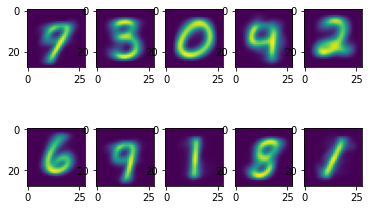

In [39]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(centroids[i])

As can be observed, there are some digits that are getting represented twice like '1' while some digits like '5' are not getting represented at all. This is because the centroids shift towards the cluster representing '1' and away from the cluster representating '5'. This can be further improved upon by finetuning the hyperparameters further.

In [31]:
y_pred[:20]

array([0, 1, 9, 2, 3, 9, 6, 6, 3, 0, 2, 3, 6, 2, 7, 1, 3, 6, 1, 6],
      dtype=int32)

In [32]:
ytst[:20]

[0, 4, 7, 2, 3, 7, 3, 6, 8, 6, 2, 5, 6, 2, 7, 8, 6, 0, 1, 3]